## Preprocessing

In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
prefix = 'c:/users/fre_f/PythonProjects/Bacteriological/Data/'
df = pd.read_csv(prefix+'DEDorNot.csv')

In [14]:
df.head()

,Unnamed: 0,Patient=1,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0.0,0.0,...,0.0,0.0,0.0,0.000000,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0.0,0.0,...,0.0,0.0,0.0,0.000000,1,67,0,0,31.25,17.0
2,P3,1,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0.0,0.0,...,0.0,0.0,0.0,1.888039,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0.0,0.0,...,0.0,0.0,0.0,0.000000,1,66,0,0,93.75,21.0
4,P5,1,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0.0,0.0,...,0.0,0.0,0.0,0.000000,0,69,0,0,6.25,7.0


In [15]:
df.iloc[:,2:27]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Bacteria;NA,Bacteria;Nitrospirae,Bacteria;Parcubacteria,Bacteria;Proteobacteria,Bacteria;Saccharibacteria,Bacteria;Spirochaetae,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia
0,0.000000,0.000000,0.0,7.611053,0.0,5.904923,0.0,0.0,1.015293,1.540256,...,0.0,0.0,0.0,46.463790,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,63.378147,0.0,0.870340,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,13.216878,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.023263,0.714645,0.0,8.328215,0.0,6.578825,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,34.975713,0.0,0.000000,0.0,0.0,0.0,1.888039
3,0.000000,0.000000,0.0,16.352201,0.0,1.376368,0.0,0.0,0.000000,0.563752,...,0.0,0.0,0.0,42.323743,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.016438,0.000000,0.0,22.581454,0.0,3.539356,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,43.249182,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.012770,0.000000,0.0,55.778911,0.0,1.831416,0.0,0.0,0.788541,0.230922,...,0.0,0.0,0.0,22.956018,0.0,0.280938,0.0,0.0,0.0,0.000000
87,0.015267,0.000000,0.0,45.513669,0.0,0.052924,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,8.391516,0.0,0.000000,0.0,0.0,0.0,0.000000
88,0.039451,0.000000,0.0,28.438504,0.0,0.684141,0.0,0.0,0.076016,0.000000,...,0.0,0.0,0.0,65.348421,0.0,0.000000,0.0,0.0,0.0,0.000000
89,0.000000,0.000000,0.0,59.530249,0.0,0.466834,0.0,0.0,0.014589,0.000000,...,0.0,0.0,0.0,5.248510,0.0,0.000000,0.0,0.0,0.0,0.000000


In [16]:
print(df.iloc[:,1])

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64


In [17]:
X = df.iloc[:,2:27]
y = df.iloc[:,1]

In [18]:
print(X)

    None;Other  Archaea;Euryarchaeota  Bacteria;Acidobacteria  \
0     0.000000               0.000000                     0.0   
1     0.000000               0.000000                     0.0   
2     0.023263               0.714645                     0.0   
3     0.000000               0.000000                     0.0   
4     0.016438               0.000000                     0.0   
..         ...                    ...                     ...   
86    0.012770               0.000000                     0.0   
87    0.015267               0.000000                     0.0   
88    0.039451               0.000000                     0.0   
89    0.000000               0.000000                     0.0   
90    0.074220               0.000000                     0.0   

    Bacteria;Actinobacteria  Bacteria;Armatimonadetes  Bacteria;Bacteroidetes  \
0                  7.611053                       0.0                5.904923   
1                 63.378147                       0.0    

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 25)
(19, 25)
(72,)
(19,)


In [21]:
def xgbmetrics():
    y_pred = clfxgb.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

In [22]:
def lgbmetrics():
    y_pred = clflgbm.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    cf = confusion_matrix(y_test, y_pred)
    target_names = ['1', '0']
    print(f"Balanced accuracy: {bal_acc}")
    print(f"MCC: {mcc}")
    print(f"F1: {f1}")
    print(f"Confusion matrix: \n{cf}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, target_names=target_names)}")

## Train and predict

In [23]:
clfxgb = XGBClassifier().fit(X_train, y_train)
clfxgb.predict(X_test)

xgbmetrics()

Balanced accuracy: 0.5214285714285715
MCC: 0.03912303982179758
F1: 0.5128205128205129
Confusion matrix: 
[[2 3]
 [5 9]]
Classification report: 
              precision    recall  f1-score   support

           1       0.29      0.40      0.33         5
           0       0.75      0.64      0.69        14

    accuracy                           0.58        19
   macro avg       0.52      0.52      0.51        19
weighted avg       0.63      0.58      0.60        19



In [24]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
clflgbm = LGBMClassifier().fit(X_train, y_train)
clflgbm.predict(X_test)

lgbmetrics()

Balanced accuracy: 0.5214285714285715
MCC: 0.03912303982179758
F1: 0.5128205128205129
Confusion matrix: 
[[2 3]
 [5 9]]
Classification report: 
              precision    recall  f1-score   support

           1       0.29      0.40      0.33         5
           0       0.75      0.64      0.69        14

    accuracy                           0.58        19
   macro avg       0.52      0.52      0.51        19
weighted avg       0.63      0.58      0.60        19



## XAI

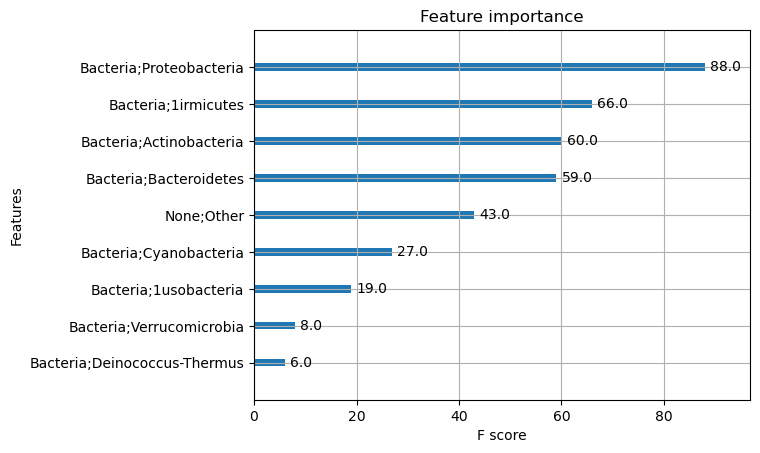

In [25]:
from xgboost import plot_importance
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

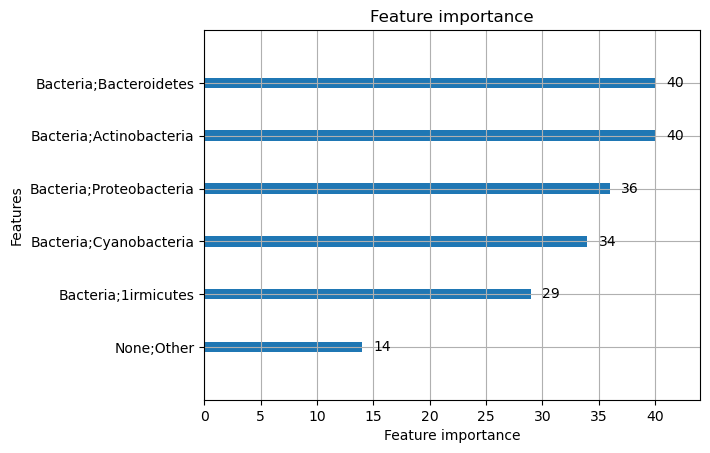

In [26]:
lgb.plot_importance(clflgbm)